# Optimizing User Experience and Sustainability in Ford GoBike's Bay Area Bike Sharing System
## by (Giwa Temitopeoluwa Hafsat)




## Investigation Overview


> This presentation is to show how the age of users,their gender,their ride duration might affect how consistent they are with Ford GoBike sharing system i.e the user type(customer or subscriber). 

> Here are the key insights I arrived at in my data exploration:

* There were more of subscribers than customers in february 2019 which is a really great deal for the bike sharing system.


* More males rented bikes than other genders


* Most bike users spend between 0 and 60 minutes while taking a ride with the bikes


* The bike sharing system has more bike users on thursdays and even on weekdays in general


* Most users are between the ages of 25 and 40 years old


* Customers spend more time on rides before getting to their destinations


* Users take more time before dropping the bikes are the nearest end stations on weekends


* There is a weak negative relationship between age and ride duration of customers i.e the higher their age,the lower their ride durations


* There is a weak positive relationship between age and ride duration of subscribers i.e the higher their age,the higher their ride durations






## Dataset Overview

> The dataset was gathered for the rides in February 2019.It is made up of 183412 rows and 16 columns where 9 of the columns are numeric in nature,5 are categorical while the rest are time format.

In [227]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [228]:
#read dataset and make copy
ford = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_copy = ford.copy()

In [229]:
#get first 10 rows
ford_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,28/02/2019 17:32,01/03/2019 8:01,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,28/02/2019 18:53,01/03/2019 6:42,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,28/02/2019 12:13,01/03/2019 5:24,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,28/02/2019 17:54,01/03/2019 4:02,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,28/02/2019 23:54,01/03/2019 0:20,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,28/02/2019 23:49,01/03/2019 0:19,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,28/02/2019 23:55,01/03/2019 0:14,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,28/02/2019 23:41,01/03/2019 0:08,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,28/02/2019 23:41,01/03/2019 0:08,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,28/02/2019 23:49,01/03/2019 0:07,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [230]:
#get last 10 rows
ford_copy.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183402,122,01/02/2019 0:17,01/02/2019 0:19,119.0,18th St at Noe St,37.761047,-122.432642,120.0,Mission Dolores Park,37.761420,-122.426435,4326,Subscriber,NaN,NaN,No
183403,249,01/02/2019 0:15,01/02/2019 0:19,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4642,Subscriber,2000.0,Male,No
183404,256,01/02/2019 0:12,01/02/2019 0:17,241.0,Ashby BART Station,37.852477,-122.270213,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4845,Subscriber,1980.0,Male,Yes
183405,111,01/02/2019 0:14,01/02/2019 0:16,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,19.0,Post St at Kearny St,37.788975,-122.403452,4832,Subscriber,1984.0,Male,No
183406,706,01/02/2019 0:04,01/02/2019 0:16,138.0,Jersey St at Church St,37.750900,-122.427411,78.0,Folsom St at 9th St,37.773717,-122.411647,5017,Subscriber,1988.0,Male,No
183407,480,01/02/2019 0:04,01/02/2019 0:12,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,01/02/2019 0:05,01/02/2019 0:10,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,01/02/2019 0:06,01/02/2019 0:08,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,01/02/2019 0:05,01/02/2019 0:07,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,01/02/2019 0:00,01/02/2019 0:04,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [231]:
#get 10 random rows of dataset
ford_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
149780,918,06/02/2019 18:43,06/02/2019 18:58,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,115.0,Jackson Playground,37.765026,-122.398773,5357,Subscriber,1983.0,Female,No
167451,605,04/02/2019 17:12,04/02/2019 17:22,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,4924,Subscriber,1995.0,Male,No
146964,648,07/02/2019 8:16,07/02/2019 8:27,85.0,Church St at Duboce Ave,37.770083,-122.429156,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5412,Customer,1984.0,Male,No
100915,494,14/02/2019 17:57,14/02/2019 18:05,372.0,Madison St at 17th St,37.804037,-122.262409,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,4807,Subscriber,1985.0,Female,No
13475,200,27/02/2019 16:05,27/02/2019 16:09,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,4754,Subscriber,1997.0,Male,Yes
50983,483,21/02/2019 18:28,21/02/2019 18:36,58.0,Market St at 10th St,37.776619,-122.417385,107.0,17th St at Dolores St,37.763015,-122.426497,5084,Subscriber,1992.0,Male,No
165101,679,05/02/2019 7:41,05/02/2019 7:52,22.0,Howard St at Beale St,37.789756,-122.394643,10.0,Washington St at Kearny St,37.795393,-122.404770,3643,Subscriber,NaN,NaN,No
5031,311,28/02/2019 14:17,28/02/2019 14:22,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4710,Subscriber,1985.0,Female,No
38688,2496,23/02/2019 10:54,23/02/2019 11:36,380.0,Masonic Ave at Turk St,37.779047,-122.447291,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6389,Subscriber,1991.0,Female,No
149012,267,06/02/2019 20:14,06/02/2019 20:19,80.0,Townsend St at 5th St,37.775235,-122.397437,114.0,Rhode Island St at 17th St,37.764478,-122.402570,5024,Subscriber,1990.0,Female,No


In [232]:
#obtain dataset information
ford_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [233]:
#Check dataset dimension
ford_copy.shape

(183412, 16)

In [234]:
#check for missing values in each column
ford_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [235]:
#check for duplicates in dataset
ford_copy.duplicated().sum()

0

In [236]:
def column_count(column):
    return ford_copy[column].value_counts()

#getting count of each gender
print('This is the count of genders')
print()
print(column_count('member_gender'))

#getting count of each birth year
print()
print('This is the count of members year of birth')
print()
print(column_count('member_birth_year'))

#getting count for shared and unshared trips
print()
print('This is the count of shared and unshared trips')
print()
print(column_count('bike_share_for_all_trip'))

This is the count of genders

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

This is the count of members year of birth

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
          ...  
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year, Length: 75, dtype: int64

This is the count of shared and unshared trips

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


In [237]:
#count of start stations
print()
print('This is the count of bike start stations')
print()
print(column_count('start_station_name'))

#count of end stations
print()
print('This is the count of bike end stations')
print()
print(column_count('end_station_name'))


This is the count of bike start stations

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

This is the count of bike end stations

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgo

In [238]:
#converting start and end time of trips to datetime format
ford_copy.end_time = pd.to_datetime(ford_copy.end_time)
ford_copy.start_time = pd.to_datetime(ford_copy.start_time)

In [239]:
#get 10 random rows
ford_copy.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
157855,775,2019-05-02 20:19:00,2019-05-02 20:32:00,58.0,Market St at 10th St,37.776619,-122.417385,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,2053,Subscriber,1989.0,Male,No
34300,1135,2019-02-24 05:07:00,2019-02-24 05:26:00,10.0,Washington St at Kearny St,37.795393,-122.404770,132.0,24th St at Chattanooga St,37.751819,-122.426614,6533,Subscriber,1973.0,Male,Yes
104987,685,2019-02-14 07:48:00,2019-02-14 07:59:00,47.0,4th St at Harrison St,37.780955,-122.399749,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,2101,Subscriber,1989.0,Female,No
93481,941,2019-02-15 17:29:00,2019-02-15 17:45:00,355.0,23rd St at Tennessee St,37.755367,-122.388795,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6505,Customer,1994.0,Male,No
82534,1111,2019-02-18 09:41:00,2019-02-18 10:00:00,207.0,Broadway at Coronado Ave,37.835788,-122.251621,245.0,Downtown Berkeley BART,37.870139,-122.268422,52,Subscriber,1974.0,Male,No
130459,813,2019-09-02 17:14:00,2019-09-02 17:28:00,126.0,Esprit Park,37.761634,-122.390648,88.0,11th St at Bryant St,37.770030,-122.411726,3117,Customer,1994.0,Male,No
82756,299,2019-02-18 09:13:00,2019-02-18 09:18:00,60.0,8th St at Ringold St,37.774520,-122.409449,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6514,Subscriber,1992.0,Male,No
27152,164,2019-02-25 10:11:00,2019-02-25 10:14:00,122.0,19th St at Mission St,37.760299,-122.418892,123.0,Folsom St at 19th St,37.760594,-122.414817,563,Customer,1986.0,Female,No
94988,783,2019-02-15 15:16:00,2019-02-15 15:29:00,126.0,Esprit Park,37.761634,-122.390648,16.0,Steuart St at Market St,37.794130,-122.394430,5431,Subscriber,1991.0,Male,No
69281,422,2019-02-19 19:50:00,2019-02-19 19:57:00,89.0,Division St at Potrero Ave,37.769218,-122.407646,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,5013,Customer,1983.0,Male,No


In [240]:
#count of bike user types
print()
print('This is the count of bike user types')
print()
print(column_count('user_type'))


This is the count of bike user types

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64


In [241]:
#dropping missing values
ford_copy.dropna(inplace = True)

In [242]:
#converting station ids and member birth year to integers
ford_copy[['start_station_id','end_station_id','member_birth_year']] = ford_copy[['start_station_id','end_station_id','member_birth_year']].astype(int)

In [243]:
#dataset information
ford_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int32
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null int32
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int32
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int32(3), int64(2), object(5)
memor

In [244]:
#converting trip duration to minutes
ford_copy.duration_sec = ford_copy.duration_sec/60

In [245]:
#renaming trip duration column
ford_copy.rename(columns = {'duration_sec':'trip_duration_in_minutes'},inplace = True)

In [246]:
#rounding trip durations in minute
ford_copy.trip_duration_in_minutes = round(ford_copy.trip_duration_in_minutes).astype(int)

In [247]:
#get first 3 rows
ford_copy.head(3)

,trip_duration_in_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,870,2019-02-28 17:32:00,2019-01-03 08:01:00,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,1031,2019-02-28 12:13:00,2019-01-03 05:24:00,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,608,2019-02-28 17:54:00,2019-01-03 04:02:00,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No


In [248]:
#resetting index because we dropped null values but the dataset still retained the former index
ford_copy = ford_copy.reset_index().drop(columns = ['index'])

In [249]:
#getting first five rows
ford_copy.head()

,trip_duration_in_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,870,2019-02-28 17:32:00,2019-01-03 08:01:00,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
1,1031,2019-02-28 12:13:00,2019-01-03 05:24:00,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
2,608,2019-02-28 17:54:00,2019-01-03 04:02:00,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
3,26,2019-02-28 23:54:00,2019-01-03 00:20:00,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
4,30,2019-02-28 23:49:00,2019-01-03 00:19:00,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [250]:
#getting approximate ages of bike users
ford_copy['member_approximate_age'] = 2019 - ford_copy.member_birth_year
ford_copy = ford_copy.drop(columns = ['member_birth_year'])
ford_copy.head()

,trip_duration_in_minutes,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_approximate_age
0,870,2019-02-28 17:32:00,2019-01-03 08:01:00,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35
1,1031,2019-02-28 12:13:00,2019-01-03 05:24:00,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47
2,608,2019-02-28 17:54:00,2019-01-03 04:02:00,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30
3,26,2019-02-28 23:54:00,2019-01-03 00:20:00,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45
4,30,2019-02-28 23:49:00,2019-01-03 00:19:00,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60


In [251]:
#getting weekdays for each trip start time
ford_copy['day'] = ford_copy['start_time'].dt.weekday_name

In [252]:
#obtaining summary statistics for dataset integers
ford_copy.describe()

,trip_duration_in_minutes,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_approximate_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733224,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,34.196865
std,27.372059,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,1.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,18.000000
25%,5.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,27.000000
50%,8.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,32.000000
75%,13.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,39.000000
max,1409.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,141.000000


In [253]:
#getting unique ages
ford_copy.member_approximate_age.unique()

array([ 35,  47,  30,  45,  60,  36,  31,  27,  23,  26,  29,  38,  44,
        41,  28,  22,  33,  19,  37,  24,  39,  46,  34,  48,  40,  52,
        21,  25,  42,  20,  32,  50,  56,  43,  55,  54,  58,  51,  53,
        57,  65,  61,  59,  49,  63,  62,  74, 119,  67,  71,  68,  78,
        69,  70,  66,  64,  73,  72,  88,  76,  77,  99,  86,  18, 141,
       118,  75,  91,  85,  80,  89, 117, 109,  81,  92], dtype=int64)

In [254]:
#dropping start time,endtime,startion id,station latitude and longitudes,etc columns
ford_copy = ford_copy.drop(columns = ['start_time','end_time',
                                      'start_station_id','start_station_latitude','start_station_longitude',
                                      'end_station_id','end_station_latitude','end_station_longitude',
                                      'bike_share_for_all_trip','bike_id'])

In [255]:
#getting trip dataset for same start and end stations
same_start_end = ford_copy[ford_copy['start_station_name'] == ford_copy['end_station_name']]

In [256]:
#getting a count of each user type with same start and end stations
same_start_end.user_type.value_counts()

Subscriber    2560
Customer       898
Name: user_type, dtype: int64

In [257]:
#count of trips per day of the week
print(column_count('day'))

Thursday     33050
Wednesday    29295
Tuesday      28364
Saturday     22889
Monday       22757
Friday       21836
Sunday       16761
Name: day, dtype: int64


In [258]:
#dataset information
ford_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 7 columns):
trip_duration_in_minutes    174952 non-null int32
start_station_name          174952 non-null object
end_station_name            174952 non-null object
user_type                   174952 non-null object
member_gender               174952 non-null object
member_approximate_age      174952 non-null int32
day                         174952 non-null object
dtypes: int32(2), object(5)
memory usage: 8.0+ MB


In [259]:
#first 5 rows of dataset
ford_copy.head()

,trip_duration_in_minutes,start_station_name,end_station_name,user_type,member_gender,member_approximate_age,day
0,870,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,35,Thursday
1,1031,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,47,Thursday
2,608,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,30,Thursday
3,26,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,45,Thursday
4,30,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,60,Thursday


In [260]:
#correlation between integer value columns
ford_copy.corr()

,trip_duration_in_minutes,member_approximate_age
trip_duration_in_minutes,1.000000,0.006002
member_approximate_age,0.006002,1.000000


In [261]:
#converting days of the week to its ordinal form
days = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}
day_cat = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = days['day'])
ford_copy.day = ford_copy.day.astype(day_cat)

In [262]:
#obtaining summary statistics for dataset integers
ford_copy.describe()

,trip_duration_in_minutes,member_approximate_age
count,174952.000000,174952.000000
mean,11.733224,34.196865
std,27.372059,10.118731
min,1.000000,18.000000
25%,5.000000,27.000000
50%,8.000000,32.000000
75%,13.000000,39.000000
max,1409.000000,141.000000


<a id='univ'></a>
## Univariate Exploration



# Visualization

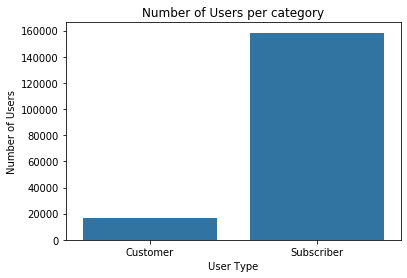

In [263]:
#plotting a bar chart of comparison of customers and subscribers
color = sb.color_palette()[0]
sb.countplot(data = ford_copy,x = 'user_type',color = color)
plt.title('Number of Users per category')
plt.xlabel('User Type')
plt.ylabel('Number of Users');

# Observations

From the plot,it's obvious that there were more of subscribers than customers in february 2019 which is a really great deal for the bike sharing system.

# Visualization

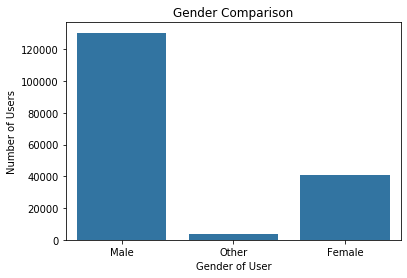

In [264]:
#plotting a bar plot that shows comparison of gender counts for trips in feb 2019
sb.countplot(data = ford_copy,x = 'member_gender',color = color)
plt.title('Gender Comparison')
plt.xlabel('Gender of User')
plt.ylabel('Number of Users');

# Observations

From the plot,we can see that more males rented bikes than other genders.

# Visualization

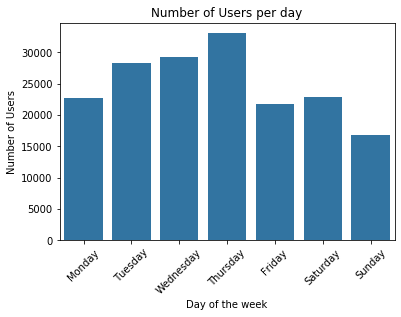

In [265]:
#plotting a bar plot for comparison of user counts per day
sb.countplot(data = ford_copy,x = 'day',color = color)
plt.xticks(rotation = 45)
plt.title('Number of Users per day')
plt.xlabel('Day of the week')
plt.ylabel('Number of Users');

# Observations

* It is obvious that the bike sharing system has more bike users on thursdays and even on weekdays in general

# Visualization

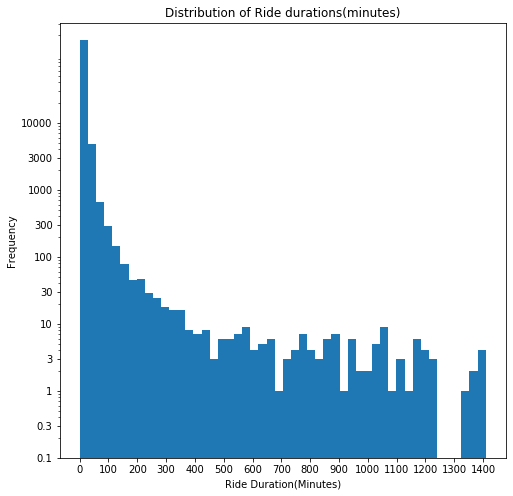

In [266]:
#plotting a histogram to show the distribution of trip duration in feb 2019
plt.figure(figsize = (8,8))
xtick = np.arange(0,ford_copy['trip_duration_in_minutes'].max(),100)
ytick = [0.1,0.3,1,3,10,30,100,300,1000,3000,10000]
plt.hist(x = ford_copy['trip_duration_in_minutes'],bins = 50,log = True)
plt.title('Distribution of Ride durations(minutes)')
plt.xlabel('Ride Duration(Minutes)')
plt.ylabel('Frequency');
plt.xticks(xtick,xtick)
plt.yticks(ytick,ytick);

# Observations

1. The distribution of the ride durations is very much rightly skewed i.e it doesn't follow a normal distribution
2. Most bike users spend between 0 and 60 minutes while taking a ride with the bikes. 
3. There are also outliers in the ride durations roughly between 1300 minutes and 1400 minutes

# Visualization

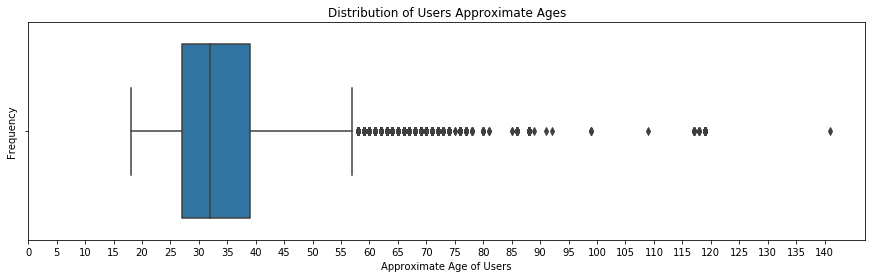

In [267]:
#plotting a boxplot to show the distribution of user ages
plt.figure(figsize = (15,4))
xtick = np.arange(0,ford_copy['member_approximate_age'].max(),5)
sb.boxplot(x = ford_copy['member_approximate_age'])
plt.xticks(xtick,xtick)
plt.title('Distribution of Users Approximate Ages')
plt.xlabel('Approximate Age of Users')
plt.ylabel('Frequency');

# Observations

Most users are between the ages of 25 and 40

<a id='bi'></a>
## Bivariate Exploration


# Visualization

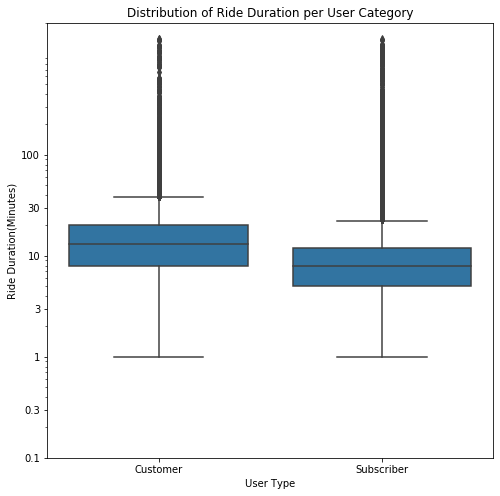

In [268]:
#boxplots for comparison of distribution of ride duration for each user type
plt.figure(figsize = (8,8))
sb.boxplot(data = ford_copy, x = 'user_type', y = 'trip_duration_in_minutes',color = color)
plt.yscale('log')
plt.yticks([0.1,0.3,1,3,10,30,100],[0.1,0.3,1,3,10,30,100])
plt.title('Distribution of Ride Duration per User Category')
plt.xlabel('User Type')
plt.ylabel('Ride Duration(Minutes)');

# Observations

Customers spend more time on rides before getting to their destinations

# Visualization

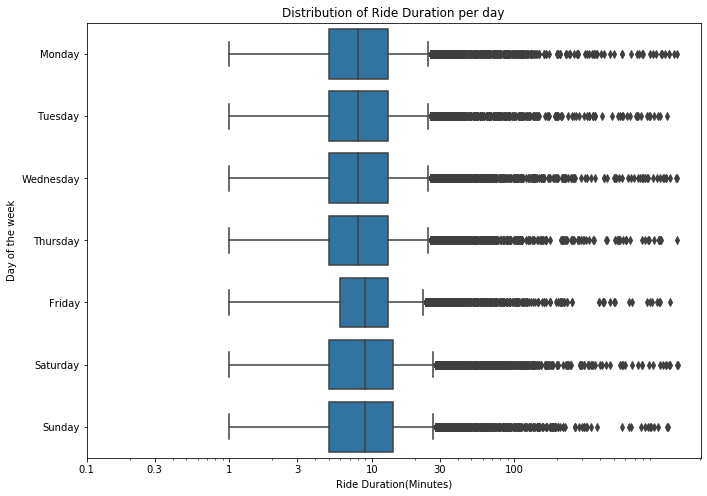

In [269]:
#boxplots for comparison of distribution of ride duration per day
plt.figure(figsize = (11,8))
sb.boxplot(data = ford_copy, x = 'trip_duration_in_minutes', y = 'day',color = color)
plt.xscale('log')
plt.xticks([0.1,0.3,1,3,10,30,100],[0.1,0.3,1,3,10,30,100])
plt.title('Distribution of Ride Duration per day')
plt.ylabel('Day of the week')
plt.xlabel('Ride Duration(Minutes)');

# Observations

Users take more time before dropping the bikes are the nearest end stations on weekends

<a id='multi'></a>
## Multivariate Exploration


# Visualization

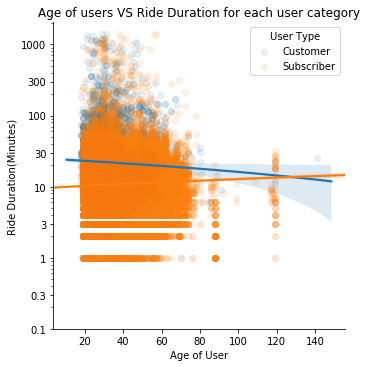

In [270]:
#plotting relationships between age of users and their ride durations with respect to the user type
ytick = [0.1,0.3,1,3,10,30,100,300,1000]
sb.lmplot(data = ford_copy,x = 'member_approximate_age',y = 'trip_duration_in_minutes',hue = 'user_type',scatter_kws={'alpha':0.1},legend = False)
plt.title('Age of users VS Ride Duration for each user category')
plt.xlabel('Age of User')
plt.ylabel('Ride Duration(Minutes)')
plt.yscale('log')
plt.legend(title = 'User Type')
plt.yticks(ytick,ytick);

# Observations

1. There is a weak negative relationship between age and ride duration of customers i.e the higher their age,the lower their ride durations
2. There is a weak positive relationship between age and ride duration of subscribers i.e the higher their age,the higher their ride durations

<a id='conclusions'></a>
## Conclusions
> The bike sharing system has its advantages and disadvanges but one of its advantages is making transit convenient and flexible. Even if the users of the bikes mostly make their orders on weekdays,mainly Thursdays.With respect to trip duration.This contributes to the engagement of users in using the system for long duration journeys on weekends and shorter ones on weekdays because the weekend journeys are usually occasional while the one on weekdays are more repititive. This benefits is one the reasons subscribers stand out more.


<a id='ref'></a>
# References

* [Trip Advisor](https://www.tripadvisor.com/Attraction_Review-g60713-d12951811-Reviews-Ford_GoBike-San_Francisco_California.html)
* [Ford Website](https://www.ford.com/)
* [Tom's Blog](https://www.tomsofmaine.com/good-matters/thinking-sustainably/benefits-bike-sharing-you-and-planet)

In [272]:
!jupyter nbconvert Part_II_Explanation_data_analysis_slide_deck --to slides --post serve --template output-toggle

[NbConvertApp] Converting notebook Part_II_Explanation_data_analysis_slide_deck.ipynb to slides
[NbConvertApp] Writing 499093 bytes to Part_II_Explanation_data_analysis_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\23481\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\23481\Anaconda3\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\23481\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\23481\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\23481\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self